In [94]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
print("tensorflow version {}".format(tf.VERSION))

tensorflow version 1.12.0


In [96]:
#building the graph (the actual computation does not happen here, though its tempting to think of that)
#build the engine
g0=tf.Graph()
with g0.as_default():
    a = tf.constant([[1,2]], dtype=tf.float32,name='a_constant')
    b = tf.constant([[2,3]], dtype=tf.float32,name='b_constant')
    c=tf.add(a,b,name='op')  # c = a + b
    d=tf.multiply(c,a,name='op') #d = c * a
print(a)
print(b)
print(c)
print(d)

Tensor("a_constant:0", shape=(1, 2), dtype=float32)
Tensor("b_constant:0", shape=(1, 2), dtype=float32)
Tensor("op:0", shape=(1, 2), dtype=float32)
Tensor("op_1:0", shape=(1, 2), dtype=float32)


In [91]:
#computation occurs
#start the engine
sess0=tf.Session(graph=g0)
result=sess0.run([a,c,d])
print(result)

#visualize the graph
writer = tf.summary.FileWriter('.',sess0.graph)
writer.flush()

sess0.close()

[array([[1., 2.]], dtype=float32), array([[3., 5.]], dtype=float32), array([[ 3., 10.]], dtype=float32)]


In [87]:
!pwd

/Users/haobei/Projects/Tutorial


In [5]:
#tensor math matrix
#with "defaultGraph".as_default():
g1=tf.Graph()
a0 = tf.constant(2)
with g1.as_default():
    a = tf.random_normal([2,3], dtype=tf.float32,name='a_random')
    b = tf.constant([[1,2],[2,3],[3,4]], dtype=tf.float32,name='b')
    op = tf.print("value of a",a,name='print')
    var_x = tf.get_variable("var_x", [2,2], dtype=tf.float32, trainable=False,
                            initializer=tf.zeros_initializer)
    c = tf.matmul(a,b,name='matmul') # a @ b
    d = c + var_x -var_x #tf.add
print(a0,a0.graph)
print(a,a.graph)
print(b,b.graph)
print(op,op.graph)
print(var_x,var_x.graph)
print(c,c.graph)
print(d,d.graph)

Tensor("Const_1:0", shape=(), dtype=int32) <tensorflow.python.framework.ops.Graph object at 0xb35c58978>
Tensor("a:0", shape=(2, 3), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb35cef550>
Tensor("b:0", shape=(3, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb35cef550>
name: "print"
op: "PrintV2"
input: "print_format"
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
<tf.Variable 'var_x:0' shape=(2, 2) dtype=float32_ref> <tensorflow.python.framework.ops.Graph object at 0xb35cef550>
Tensor("matmul:0", shape=(2, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb35cef550>
Tensor("sub:0", shape=(2, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb35cef550>


In [6]:
sess1=tf.Session(graph=g1)

In [7]:
print(sess1.run(op))
print(sess1.run(a)) #print(a.eval(session=sess))
print(sess1.run('matmul'))
print(sess1.run('matmul:0')) #c
with g1.as_default():
    sess1.run(tf.global_variables_initializer())
print(sess1.run(var_x))
print(sess1.run(d))

None
[[ 1.6203959  -0.25817335 -0.905388  ]
 [ 0.08479825 -0.5606226  -0.5153058 ]]
None
[[-0.77504206 -0.815948  ]
 [ 2.5001712   3.4719322 ]]
[[0. 0.]
 [0. 0.]]
[[ 7.7691455 11.842758 ]
 [-1.4539969 -1.8722095]]


In [103]:
writer = tf.summary.FileWriter('.',sess1.graph)
writer.flush()

In [9]:
with g1.as_default():
    print(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)) 
    print(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

[<tf.Variable 'var_x:0' shape=(2, 2) dtype=float32_ref>]
[]


In [10]:
sess1.close()

In [100]:
tf.reset_default_graph()

x_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(1,),dtype=tf.float32,
                    initializer=tf.ones_initializer,
                    trainable=True)
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.zeros_initializer,
                    trainable=True)

In [101]:
y_hat = W * x_p + b
loss = tf.reduce_mean(tf.square(y_hat - y_p))
gradient = tf.gradients(loss,[W,b])

In [102]:
x = np.array([[1], [2], [3], [4]],dtype=np.float32)
y = np.array([[4], [3], [2], [1]],dtype=np.float32)
sess=tf.Session()
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()
sess.run(tf.global_variables_initializer())
W_init = sess.run([W,b])
print(W_init)
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print(prediction)
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    W_old,b_old = sess.run([W,b])
    sess.run([W.assign_sub(0.1*grad[0]),b.assign_sub(0.1*grad[1])])
    W_new,b_new = sess.run([W,b])
    print(i,"gradient: ",grad[0], "\t", W_old,b_old, "==>",W_new,b_new)
print(sess.run([W,b]))

[array([1.], dtype=float32), array([0.], dtype=float32)]
[array([[1.],
       [2.],
       [3.],
       [4.]], dtype=float32), 5.0, [array([5.], dtype=float32), array([0.], dtype=float32)]]
0 gradient:  [5.] 	 [1.] [0.] ==> [0.5] [0.]
1 gradient:  [-2.5] 	 [0.5] [0.] ==> [0.75] [0.25]
2 gradient:  [2.5] 	 [0.75] [0.25] ==> [0.5] [0.325]
3 gradient:  [-0.87499976] 	 [0.5] [0.325] ==> [0.5875] [0.51]
4 gradient:  [1.3624997] 	 [0.5875] [0.51] ==> [0.45125002] [0.61425]
5 gradient:  [-0.15999997] 	 [0.45125002] [0.61425] ==> [0.46725002] [0.765775]
6 gradient:  [0.8376255] 	 [0.46725002] [0.765775] ==> [0.38348746] [0.878995]
7 gradient:  [0.14728665] 	 [0.38348746] [0.878995] ==> [0.3687588] [1.0114523]
8 gradient:  [0.5886433] 	 [0.3687588] [1.0114523] ==> [0.30989447] [1.1247824]
9 gradient:  [0.2723292] 	 [0.30989447] [1.1247824] ==> [0.28266156] [1.2448788]
10 gradient:  [0.46431732] 	 [0.28266156] [1.2448788] ==> [0.23622982] [1.3545723]
11 gradient:  [0.31630898] 	 [0.23622982] [1.

In [99]:
#Training of hundreds of layers and millions of weights (variables)
print(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)) 
print(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

[<tf.Variable 'weight:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]
[<tf.Variable 'weight:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>]


In [15]:
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print("prediction")
print(prediction[0])
print("target")
print(y)

prediction
[[3.8392346]
 [2.9220982]
 [2.004962 ]
 [1.0878255]]
target
[[4.]
 [3.]
 [2.]
 [1.]]


In [16]:
sess.close()

In [17]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[0],[1],[1]])
#tf.sigmoid() tf.reduce_sum(...,axis=?)

In [18]:
tf.reset_default_graph()

x_p = tf.placeholder(dtype=tf.float32,shape=(None,2),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(2,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)

In [19]:
y_hat = tf.sigmoid(tf.reduce_sum(x_p*W,1)+b)
loss = tf.reduce_mean(tf.square(y_hat - y_p))
gradient = tf.gradients(loss,[W,b])

In [20]:
sess=tf.Session()
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()
sess.run(tf.global_variables_initializer())
W_init = sess.run([W,b])
print(W_init)
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print(prediction)
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    W_old,b_old = sess.run([W,b])
    sess.run([W.assign_sub(0.1*grad[0]),b.assign_sub(0.1*grad[1])])
    W_new,b_new = sess.run([W,b])
    print(i,"gradient: ",grad[0], "\t", W_old,b_old, "==>",W_new,b_new)
sess.run([W,b])

[array([ 0.26533636, -0.78685606], dtype=float32), array([-0.17807327], dtype=float32)]
[array([0.45559895, 0.52180195, 0.27589235, 0.33190247], dtype=float32), 0.27023193, [array([-0.01591718, -0.04102288], dtype=float32), array([-0.04380918], dtype=float32)]]
0 gradient:  [-0.01591718 -0.04102288] 	 [ 0.26533636 -0.78685606] [-0.17807327] ==> [ 0.26692808 -0.78275377] [-0.17369236]
1 gradient:  [-0.01554592 -0.04075146] 	 [ 0.26692808 -0.78275377] [-0.17369236] ==> [ 0.26848266 -0.7786786 ] [-0.16937037]
2 gradient:  [-0.01517705 -0.04047788] 	 [ 0.26848266 -0.7786786 ] [-0.16937037] ==> [ 0.27000037 -0.7746308 ] [-0.16510704]
3 gradient:  [-0.01481065 -0.04020233] 	 [ 0.27000037 -0.7746308 ] [-0.16510704] ==> [ 0.27148142 -0.7706106 ] [-0.1609021]
4 gradient:  [-0.01444688 -0.039925  ] 	 [ 0.27148142 -0.7706106 ] [-0.1609021] ==> [ 0.27292612 -0.7666181 ] [-0.15675525]
5 gradient:  [-0.01408579 -0.03964606] 	 [ 0.27292612 -0.7666181 ] [-0.15675525] ==> [ 0.2743347  -0.76265347] [-0.

64 gradient:  [ 0.00100953 -0.02448427] 	 [ 0.30606982 -0.5792965 ] [0.00116496] ==> [ 0.30596888 -0.5768481 ] [0.00267925]
65 gradient:  [ 0.00116174 -0.02428498] 	 [ 0.30596888 -0.5768481 ] [0.00267925] ==> [ 0.3058527 -0.5744196] [0.00416487]
66 gradient:  [ 0.00131106 -0.02408794] 	 [ 0.3058527 -0.5744196] [0.00416487] ==> [ 0.3057216 -0.5720108] [0.00562225]
67 gradient:  [ 0.00145751 -0.02389314] 	 [ 0.3057216 -0.5720108] [0.00562225] ==> [ 0.30557585 -0.5696215 ] [0.00705185]
68 gradient:  [ 0.00160113 -0.02370057] 	 [ 0.30557585 -0.5696215 ] [0.00705185] ==> [ 0.30541572 -0.56725144] [0.00845409]
69 gradient:  [ 0.00174196 -0.02351022] 	 [ 0.30541572 -0.56725144] [0.00845409] ==> [ 0.30524153 -0.5649004 ] [0.00982939]
70 gradient:  [ 0.00188005 -0.02332207] 	 [ 0.30524153 -0.5649004 ] [0.00982939] ==> [ 0.30505353 -0.5625682 ] [0.01117819]
71 gradient:  [ 0.00201541 -0.02313611] 	 [ 0.30505353 -0.5625682 ] [0.01117819] ==> [ 0.30485198 -0.5602546 ] [0.0125009]
72 gradient:  [ 0

[array([ 0.294701  , -0.50218695], dtype=float32),
 array([0.04048915], dtype=float32)]

(10000,)


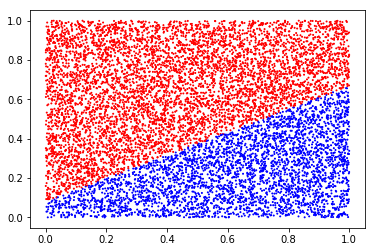

In [21]:
vis_inputs = np.random.uniform(size=(10000,2))
predictions = sess.run(y_hat,feed_dict={x_p:vis_inputs})
print(predictions.shape)
colors = list(map(lambda p: 'red' if p < 0.5 else 'blue', predictions))
plt.scatter(vis_inputs[:,0], vis_inputs[:,1], 1, colors)

In [22]:
print(sess.run(y_hat,feed_dict={x_p:x}))

[0.5101209  0.5830217  0.38658312 0.45834756]


In [23]:
sess.close()

In [77]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])
#not linear separable

In [78]:
tf.reset_default_graph()

x_p = tf.placeholder(dtype=tf.float32,shape=(None,2),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(2,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
# L = tf.get_variable("linear_transform",shape=(2,2),dtype=tf.float32,
#                     initializer=tf.glorot_normal_initializer,
#                     trainable=True)
L = tf.constant([[1,-1],[-1,1]],dtype=tf.float32)
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.zeros_initializer,
                    trainable=True)

In [79]:
y_hat = tf.sigmoid(tf.reduce_sum(tf.square(x_p @ L)*W,1)+b)
loss = tf.reduce_mean(tf.square(y_hat - y_p))
# gradient = tf.gradients(loss,[W,L,b])
gradient = tf.gradients(loss,[W,b])

In [81]:
sess=tf.Session()
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()
sess.run(tf.global_variables_initializer())
# W_init = sess.run([W,L,b])
W_init = sess.run([W,b])
print(W_init)
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print(prediction)
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
#     sess.run([W.assign_sub(0.1*grad[0]),L.assign_sub(0.1*grad[1]),b.assign_sub(0.1*grad[2])])
    sess.run([W.assign_sub(0.1*grad[0]),b.assign_sub(0.1*grad[1])])
    print("{} {}".format(i,grad))
# print(sess.run([W,L,b]))
print(sess.run([W,b]))

[array([ 1.0478357, -0.4816657], dtype=float32), array([0.], dtype=float32)]
[array([0.5       , 0.63787895, 0.63787895, 0.5       ], dtype=float32), 0.2595053, [array([0.03184858, 0.03184858], dtype=float32), array([0.03184858], dtype=float32)]]
0 [array([0.03184858, 0.03184858], dtype=float32), array([0.03184858], dtype=float32)]
1 [array([0.03142013, 0.03142013], dtype=float32), array([0.03122107], dtype=float32)]
2 [array([0.03099335, 0.03099335], dtype=float32), array([0.03059916], dtype=float32)]
3 [array([0.03056849, 0.03056849], dtype=float32), array([0.02998308], dtype=float32)]
4 [array([0.03014575, 0.03014575], dtype=float32), array([0.02937295], dtype=float32)]
5 [array([0.02972538, 0.02972538], dtype=float32), array([0.02876905], dtype=float32)]
6 [array([0.02930758, 0.02930758], dtype=float32), array([0.02817149], dtype=float32)]
7 [array([0.0288925, 0.0288925], dtype=float32), array([0.02758042], dtype=float32)]
8 [array([0.02848039, 0.02848039], dtype=float32), array([0

92 [array([0.00813433, 0.00813433], dtype=float32), array([0.00100554], dtype=float32)]
93 [array([0.00802819, 0.00802819], dtype=float32), array([0.00089321], dtype=float32)]
94 [array([0.00792399, 0.00792399], dtype=float32), array([0.0007835], dtype=float32)]
95 [array([0.0078217, 0.0078217], dtype=float32), array([0.00067639], dtype=float32)]
96 [array([0.00772129, 0.00772129], dtype=float32), array([0.00057179], dtype=float32)]
97 [array([0.00762271, 0.00762271], dtype=float32), array([0.00046969], dtype=float32)]
98 [array([0.00752594, 0.00752594], dtype=float32), array([0.00037003], dtype=float32)]
99 [array([0.00743094, 0.00743094], dtype=float32), array([0.00027273], dtype=float32)]
[array([ 0.8812569, -0.6482443], dtype=float32), array([-0.11506443], dtype=float32)]


(10000,)


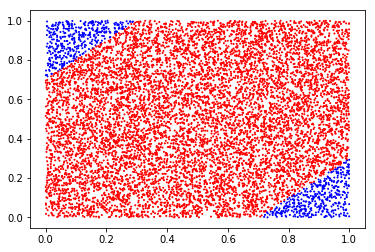

In [82]:
vis_inputs = np.random.uniform(size=(10000,2))
predictions = sess.run(y_hat,feed_dict={x_p:vis_inputs})
print(predictions.shape)
colors = list(map(lambda p: 'red' if p < 0.5 else 'blue', predictions))
plt.scatter(vis_inputs[:,0], vis_inputs[:,1], 1, colors)

In [83]:
sess.close()